In [8]:
pip install pandas numpy nltk scikit-learn matplotlib seaborn wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Accuracy: 0.7751595776412337

📋 Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.76      0.77    158640
    positive       0.77      0.79      0.78    159857

    accuracy                           0.78    318497
   macro avg       0.78      0.78      0.78    318497
weighted avg       0.78      0.78      0.78    318497


📊 Confusion Matrix:
 [[119834  38806]
 [ 32805 127052]]


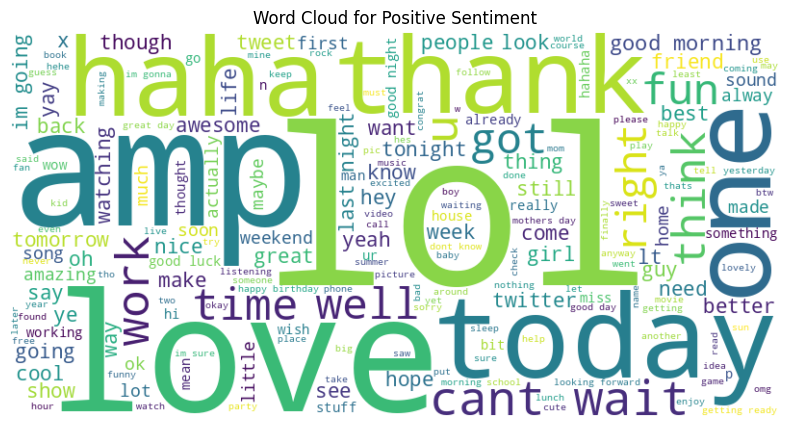

In [13]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df = pd.read_csv("tweet.csv", encoding='ISO-8859-1', header=None)

df.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Text']

df['Sentiment'] = df['Sentiment'].replace({0: 'negative', 4: 'positive'})

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_text'] = df['Text'].apply(clean_text)

df = df[df['cleaned_text'].str.strip() != ""]

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

if 'positive' in df['Sentiment'].unique():
    positive_text = " ".join(df[df['Sentiment'] == 'positive']['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for Positive Sentiment")
    plt.show()